In [1]:
### Imports necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import math

### Plotting and animation packages
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.animation
from matplotlib.colors import LinearSegmentedColormap

# Orbit Simulations
Author: Bailey Stephens <br>
Creation Date: 12/19/2021 <br>

Astronomers look to the stars to build models for how exoplanets and exomoons dance around their solar systems. However, sometimes the calculations for determining the motion of these bodies can be tedious, so it would be useful to simulate their motions so that a general prediction can be made about their motions.

### The Math
There are many forces that act on exoplanets, but their motion is dominated primarily by gravitational force. Remember that gravitational force is given by

$$
\begin{align*}
F_g = \frac{G m_1 m_2}{r^2}
\end{align*}
$$

where $G$ is the gravitational constant, $m_1$ and $m_2$ are the masses of two bodies exherting force on one another, and $r$ is the distance between these bodies. Hence, as long as we know the masses of two stellar bodies and the distance between them, we can find the force that they exert on one another. It is not sufficient to just calculate this force, though. We must also consider how these forces change an exoplanet's position and velocity. Recall that Newton's Second Law of Motion states that

$$
\begin{align*}
F = ma
\end{align*}
$$

So, if we know the gravitational force acting on an exoplanet of mass $m$, we can find its acceleration $a$. Additionally, we know that

$$
\begin{align*}
\frac{d}{dt} v(t) &= a(t) \\\\
dv(t) &= a(t) dt
\end{align*}
$$

Hence, we can find its incremental change over a time $dt$ due to some acceleration $a$. A similar argument can be made to find an incremental change in position over that same time. These small changes in position and velocity can then be added to the exoplanet's existing position / velocity to simulate their motions. To start we will only simulate a two-body system, but we can generalize this later for an n-body system.

### First Implementation
For the purposes of this project, it appears that working Cartesian coordinates (x, y) is more convenient than in polar. Hence, to find the distance between two bodies, we use the familiar
$$
\begin{align*}
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
\end{align*}
$$

Using this distance value, we can then calculate the gravitational force of one body on another. Remember that while the direction will be different, the magnitude of force that each object exherts on the other is equal in magnitude. Hence, we only need to account for the direction of these forces once the magnitude is calculated. Functions that accomplish these tasks are calculated below.

In [2]:
### Function with one return value
def calc_distance(x1, y1, x2, y2):
    
    """
    Calculates the distance between two points,
        
    Parameters
    x1: x-coordinate of first point
    y1: y-coordinate of first point
    x2: x-coordinate of second point
    y2: y-coordinate of second point

    Returns
    distance: Distance between (x1, y1) and (x2, y2)
    """

    return np.sqrt((x2-x1)**2 + (y1-y2)**2)
    
### Function with one return value
def calc_force(m1, m2, x1, y1, x2, y2):
        
    """
    Calculates the x- and y-components of force acting between two bodies

    Parameters
    m1: mass of first body
    m2: mass of second body
    x1: x-coordinate of first point
    y1: y-coordinate of first point
    x2: x-coordinate of second point
    y2: y-coordinate of second point

    Returns
    Fcomps: Components of force acting of these bodies

    REMARK: Components will change sign depending on the body
    """
    
    G = 6.67408e-11      ### Gravitational constant in units of m^3 kg^-1 s^-2

    ### Calculates the separation between the two bodies
    separation = calc_distance(x1, y1, x2, y2)
    
    if separation == 0:
        return 0.0, 0.0

    ### Calculates the gravitational force between two bodies
    F_mag = G*m1*m2/separation**2

    ### Calculates the components of force
    Fx = F_mag * (x2-x1)/separation
    Fy = F_mag * (y2-y1)/separation

    ### Calculates the force of m1 on m2 and m2 on m1
    F_comps_1 = [Fx, Fy]
    F_comps_2 = [-Fx, -Fy]

    return F_comps_1, F_comps_2

With the above functions we can now simulate the motion of our two-body system. The following code iterates for some total time max_time over intervals dt. Each iteration calculates the small changes in position and velocity and adds those values to each bodies respective position and velocity. Let's test our code by have an Earth-like object orbit a Sun-like object.

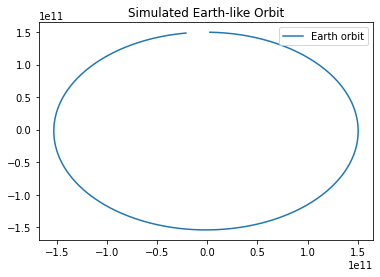

In [3]:
### Declares properties about initial position and velocities of
### each body in the solar system, as well as their masses
intial_velocities=[[0, 0], [30000, 0]]
initial_positions=[[0, 0], [0, 1.496e11]]
masses=[1.989e30, 5.972e24]
    
### Determines the max time to simulate orbits and dt for calculations
max_time = 3.15e7
dt = 86400

### Renames variables for convenience
velocity = intial_velocities
position = initial_positions

### Holds the positions of each body at each time
l1 = []
l2 = []

### Iterates over all times from 0 to max_time in intervals of dt
t = 0
while t <= max_time:
    
    F1, F2 = calc_force(masses[0], masses[1], position[0][0], position[0][1], position[1][0], position[1][1])
    a1 = [f/masses[0] for f in F1]
    a2 = [f/masses[1] for f in F2]

    dv1 = [a*dt for a in a1]
    dv2 = [a*dt for a in a2]

    velocity[0] = [v+dv for v,dv in zip(velocity[0],dv1)]
    velocity[1] = [v+dv for v,dv in zip(velocity[1],dv2)]

    dx1 = [v*dt for v in velocity[0]]
    dx2 = [v*dt for v in velocity[1]]

    position[0] = [x+dx for x,dx in zip(position[0],dx1)]
    position[1] = [x+dx for x,dx in zip(position[1],dx2)]

    l1.append(position[1])
    l2.append(position[0])

    t += dt

xs1 = [x for x,y in l1]
ys1 = [y for x,y in l1]
xs2 = [x for x,y in l2]
ys2 = [y for x,y in l2]

plt.plot(xs1, ys1, label="Earth orbit")
plt.plot(xs2, ys2)
plt.title("Simulated Earth-like Orbit")
plt.legend()

It appears that the above code works as intended! Notice that the Earth-like object nearly completes its orbit around the Sun over 365 days (which is what we would expect). So how does this generalize to a simulation with more bodies?

### N-Body Simulations

While the above code could in theory be generalized to n-bodies, it is slightly clunky in execution. Instead of declaring separate lists for the components of each body (which gets confusing quickly and is easy to make mistakes), we will use a technique known as object-oriented programming (OOP). OOP allows us to create custom classes (we will call ours "Body") with properties (such as position, velocity, etc...) and methods to manipulate or use these properties (such as updating an exoplanet's position and velocity vectors). The benefit of this is simplicity in expanding to an n-body system and user-friendly code. The described class is created below.

In [4]:
class Body:
    
    ### __init__ runs every time class is initiated, used to declare initial values
    def __init__(self, mass, position, velocity, name="unnamed body"):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.name = name
        self.position_markers = [[position[0], position[1]]]
        
    ### Method for updating and tracking body's position
    def update_position(self, new_position):
        self.position = new_position
        self.position_markers.append(new_position)
        
    ### Method for updating body's velocity
    def update_velocity(self, new_velocity):
        self.velocity = new_velocity
    
    ### Method for obtaining current x_position
    def current_x(self):
        return self.position[0]
    
    ### Method for obtaining current y_position
    def current_y(self):
        return self.position[1]
        
    ### Returns a list of body's x and y values over simulation
    def positions_history(self):
        xs = [x for x,y in self.position_markers]
        ys = [y for x,y in self.position_markers]
        return xs, ys

Most of our above methods from the above two-body model can be used, but it is worth rewriting our function for calculating force. To make this generalizable, we will make a function net_force() that when fed n-number Body types, it will calculate the total force exherted by other bodies of the first Body passed. For example, let's imagine we passed a list of information for [Earth, Sun, Mercury], then this function would calculate the total force exherted on Earth by the Sun and Mercury.

In [5]:
### Function with one return value
def net_force(exoplanets):
        
    """
    Calculates net x- and y-components of force acting on a primary body

    Parameters
    exoplanets: list of planets (of type Body) in simulation

    Returns
    net_force: Components of force acting on a planet
    """
    
    G = 6.67408e-11      ### Gravitational constant in units of m^3 kg^-1 s^-2
    net_force = [0, 0]   ### Holds the net gravitational force acting on a body of interest
    
    ### Separates primary body (body of interest) from secondary bodies (non-primary bodies)
    primary_body = exoplanets[0]
    other_bodies = exoplanets[1:]
    
    ### Iterates over every secondary body in the system
    for secondary_body in other_bodies:
        
        ### Stores the (x,y) position of primary and secondary bodies into variables
        primary_body_x = primary_body.position[0]
        primary_body_y = primary_body.position[1]
        secondary_body_x = secondary_body.position[0]
        secondary_body_y = secondary_body.position[1]
        
        ### Calculates the separation between primary and secondary bodies
        separation = calc_distance(primary_body_x, primary_body_y, secondary_body_x, secondary_body_y)
        
        ### Fixes division by zero with colliding exoplanets
        ### NOTE: This is not accurate (would need to combine the two bodies),
        ###       but it is unlikely to occur in practical settings
        if separation == 0:
            return [0.0, 0.0]
        
        ### Stores the mass of primary and secondary bodies into variables
        primary_body_mass = primary_body.mass
        secondary_body_mass = secondary_body.mass
        
        ### Calculates the magnitude of force between two bodies
        F_mag = G*primary_body_mass*secondary_body_mass/separation**2
        
        ### Calculates the components of force
        Fx = F_mag * (secondary_body_x-primary_body_x)/separation
        Fy = F_mag * (secondary_body_y-primary_body_y)/separation
        
        ### Adds component of force to net_force
        F_comps = [Fx, Fy]
        net_force = [i + j for i, j in zip(net_force, F_comps)]

    return net_force

Now, with some modifications to the simulation loop from above, the user will only need to initialize the bodies they wish to simulate and add them to bodies_list. The loop will then iterate over every body and simulate their motion over a specified time with steps of size $dt$. The below code recreates the same plot shown for a two-body system, but feel free to modify it to simulate any bodies you would like! Note that in the simulation the 'primary body' refers to the body that calculations are being done for at that moment.

Simulation Runtime: 0.20070815086364746


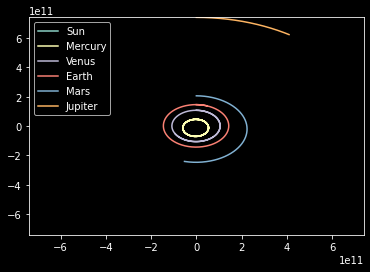

In [6]:
### Initializes bodies to simulate
### HOW TO WRITE: Body(mass of object, [x-position, y-position], [x-velocity, y-velocity], 'Name of object (optional)')
### NOTE: If you add more bodies, make sure to add them to bodies_list as well
body1 = Body(1.989e30, [0, 0], [0, 0], 'Sun')
body2 = Body(0.330e24, [0, 0.46e11], [59000, 0], 'Mercury')
body3 = Body(4.867e24, [0, 1.0748e11], [35000, 0], 'Venus')
body4 = Body(5.972e24, [0, 1.46e11], [30000, 0], 'Earth')
body5 = Body(0.64e24, [0, 2.06e11], [26500, 0], 'Mars')
body6 = Body(1898e24, [0, 7.4e11], [13720, 0], 'Jupiter')

### Declares a list of objects to simulate
bodies_list = [body1, body2, body3, body4, body5, body6]

### Declares the max time to simulate orbits and dt for calculations
### NOTE: Both of these are in units of seconds
max_time = 3.15e7
dt = 86400

### Determines the default size of the graph
### NOTE: If max_dist does not encompass all orbits, the graph will automatically
###       adjust to accomodate a larger orbit
max_dist = 2e11

### Iterates over all times from 0 to max_time in intervals of dt
t = 0
t0 = time.time()
while t <= max_time:
    
    for i in range(len(bodies_list)):
        
        ### Creates a list where 'primary body' is the first entry   
        temp_bodies_list = bodies_list.copy()
        temp_bodies_list.insert(0, temp_bodies_list.pop(i))
        
        ### Calculates the net force of secondary bodies on primary body
        force_on_primary = net_force(temp_bodies_list)
        
        ### Calculates the net acceleration of primary body
        acceleration_on_primary = [f/bodies_list[i].mass for f in force_on_primary]

        ### Calculates the small change in velocity of primary body
        dv_primary = [a*dt for a in acceleration_on_primary]
        
        ### Updates velocity of primary body to reflect the small change calculated
        velocity_primary = [v+dv for v,dv in zip(bodies_list[i].velocity,dv_primary)]
        bodies_list[i].update_velocity(velocity_primary)
        
        ### Calculates the small change in position of primary body
        dx_primary = [v*dt for v in bodies_list[i].velocity]
        
        ### Updates position of primary body to reflect the small change calculated
        position_primary = [x+dx for x,dx in zip(bodies_list[i].position,dx_primary)]
        bodies_list[i].update_position(position_primary)

    t += dt
    
print("Simulation Runtime:", time.time() - t0)

plt.style.use('dark_background')

### Plots the tracked positions of each body at each time
for body in bodies_list:
    x_pos, y_pos = body.positions_history()
    
    plt.plot(x_pos, y_pos, label=body.name)
    
    ### Finds the maximum distance from (0,0) in each orbit
    temp_x_max = abs(max(x_pos, key=abs))
    temp_y_max = abs(max(y_pos, key=abs))
    
    ### Adjusts graph dimensions to encompass each orbit completely
    if temp_x_max > max_dist:
        max_dist = temp_x_max
    if temp_y_max > max_dist:
        max_dist = temp_y_max

plt.xlim(-max_dist, max_dist)
plt.ylim(-max_dist, max_dist)
plt.legend()
plt.show()

### Making It Move
While the above graph is useful for viewing the total path spanned over the simulation, it does not convey the actual speeds at which these paths are traced. To fix this, it is useful to generate an animation depicting the motions of this simulation. Since the motions of each planet are saved as a long list of (x,y) coordinates for each planet, all we need to do is write a function that constructs each frame and combines them in order. This is done using the following animation code, which is a reworked version of [this Stack Overflow forum](https://stackoverflow.com/questions/35658472/animating-a-moving-dot).

_Remark:_ This process takes time! It is not a bad idea to start the animation generation process and come back to it in ~10-20 minutes.

MovieWriter ffmpeg unavailable; using Pillow instead.


Making animation...
TOTAL FRAMES: 363
Frame: 50
Frame: 100
Frame: 150
Frame: 200
Frame: 250
Frame: 300
Frame: 350
Runtime: 75.84087014198303


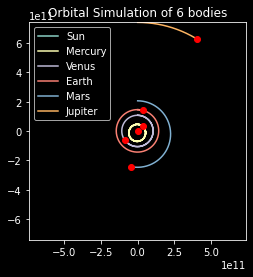

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-max_dist, max_dist), ylim=(-max_dist, max_dist))
d, = ax.plot([body.current_x() for body in bodies_list], [body.current_y() for body in bodies_list], 'ro')
ax.set_aspect('equal', adjustable='box')

### Plots the orbital path of each body
for body in bodies_list:
    x_pos, y_pos = body.positions_history()
    
    ### NOTE: zorder=-10 ensures that each orbital path is layered behind
    ###       their respective dot
    plt.plot(x_pos, y_pos, label=body.name, zorder=-10)
    
    ### Finds the maximum distance from (0,0) in each orbit
    temp_x_max = abs(max(x_pos, key=abs))
    temp_y_max = abs(max(y_pos, key=abs))
    
    ### Adjusts graph dimensions to encompass each orbit completely
    if temp_x_max > max_dist:
        max_dist = temp_x_max
    if temp_y_max > max_dist:
        max_dist = temp_y_max
        
title_string = "Orbital Simulation of " + str(len(bodies_list)) + " bodies"    

plt.style.use('dark_background')
plt.xlim(-7.4e11, 7.4e11)
plt.ylim(-7.4e11, 7.4e11)
#plt.xlim(-max_dist, max_dist)
#plt.ylim(-max_dist, max_dist)
plt.title(title_string)
plt.legend()

### Calculates maximum number of frames possible
num_frames = int(max_time/dt - 1)

### Defines dot class for animating motion of planets
class dot:
    ### Initializes dot with initial position of respective orbital body
    def __init__(self, positions_list):
        self.x = positions_list[0][0]
        self.y = positions_list[1][0]
        self.positions_list = positions_list
    
    ### Method for adjusting the position of the dot
    def move(self, i):
        self.x = self.positions_list[0][i]
        self.y = self.positions_list[1][i]

### Generates dots for each body in bodies_list
dots = [dot(body.positions_history()) for body in bodies_list]
        
### Defines how each individual frame will be generates
def animate(i):
    
    if i%50==0 and i!=0:
        print('Frame:', i)
    
    ### Adjusts each dot to next location in positions_history()
    for dot in dots:
        dot.move(i)
    d.set_data([dot.x for dot in dots],
               [dot.y for dot in dots])
    return d,

### Generates gif of orbital motions
print("Making animation...")
print("TOTAL FRAMES:", num_frames)
t0 = time.time()
anim = animation.FuncAnimation(fig, animate, frames=num_frames, interval=20, blit=True)
anim.save('1234test.gif')
print("Runtime:", time.time() - t0)

### Using NASA's Exoplanet Archive
When exoplanets are discovered, they are recorded in NASA's exoplanet archive. Since this data is downloadable in .csv files containing information about host stars and their respective exoplanets, we can import this data to make simulations of these systems. In order to use the following code, a user can either run the code as is (the most recent data is pulled from NASA's archive) or download other data and change the source directory to read that in instead.

The below code block looks at the .csv file and counts the number of exoplanets orbiting around each host star. The num_bods variable at the top allows the user to limit the list of systems with that many exoplanets.

In [8]:
######################################################################################################
###                                                                                                ###
###                                      Adjustable Parameters                                     ###
###                                                                                                ###
######################################################################################################

num_bods=4                 ### Number of exoplanets around host star
use_other_source=False     ### Determines whether or not to use a different data source
source=''                  ### Holds string with other source directory

#######################################################################################################

### Runs if user provides their own data source
if use_other_source:
    pdat = pd.read_csv(source, comment='#', error_bad_lines=False, usecols= ['hostname', 'st_mass', 'pl_bmasse', 'pl_orbsmax', 'pl_orbper', 'pl_name'])

### Runs if default data source is preferred
else:
    ### Pulls exoplanet data from GitHub
    url='https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv'
    pdat = pd.read_csv(url, comment='#', error_bad_lines=False, usecols= ['hostname', 'st_mass', 'pl_bmasse', 'pl_orbsmax', 'pl_orbper', 'pl_name'])

### Removes all rows with any missing masses / radii and resets indices
pdat = pdat.dropna(axis=0, how='any')
pdat = pdat.drop_duplicates(subset=['pl_name'])
pdat = pdat.reset_index(drop=True)

### Makes a list of all host stars logged in archive
hosts=[]
for i in range(len(pdat)):
    if pdat['hostname'][i] not in hosts:
        hosts.append(pdat['hostname'][i])

### Counts the number of exoplanets discovered around host star
counts = pd.Series(pdat['hostname']).value_counts()
#print(counts)

### Searches for systems with num_bods exoplanets
valid_systems=[]
for i in range(len(hosts)):
    if counts.get(hosts[i]) == num_bods:
        valid_systems.append(hosts[i])

### Prints the name of host stars with num_bods orbiting exoplanets
print("Systems with", num_bods, "exoplanets: \n")
print(valid_systems)

Systems with 4 exoplanets: 

['WASP-47', 'GJ 876', 'HD 164922', 'HD 160691', 'GJ 3293', 'HD 20794', 'tau Cet', 'HD 215152', 'K2-266', 'Kepler-107', 'HD 20781', 'DMPP-1', 'K2-32', 'HD 141399', 'Kepler-79', 'Kepler-80', 'Kepler-20', 'Kepler-411', 'KOI-94', 'K2-285', 'L 98-59']


The above list is populated with star systems containing a user-specified number of exoplanets (exoplanets with insufficient data are dropped). By copying a string from the above list into the host_of_interest varaible below, the user can simulate this system.

Simulation Runtime: 0.05191946029663086


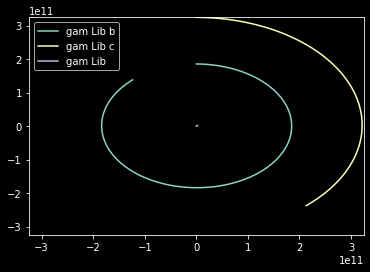

In [9]:
######################################################################################################
###                                                                                                ###
###                                      Adjustable Parameters                                     ###
###                                                                                                ###
######################################################################################################

host_of_interest='gam Lib'     ### Host star name
max_time = 3.15e7              ### Total simulation time (seconds)
dt = 86400                     ### Simulation time step (seconds)

#######################################################################################################

### Lists to hold values for each exoplanet
masses = []
xpos = []
ypos = []
xvel = []
yvel = []
pl_names = []

flag=True
for i in range(len(pdat)):
    
    ### Saves the mass of the host star to variable
    if pdat['hostname'][i]==host_of_interest and flag:
        hostmass = pdat['st_mass'][i]*1.989e30
        flag=False
    
    ### Stores exoplanet data to the above lists
    if pdat['hostname'][i]==host_of_interest:
        masses.append(pdat['pl_bmasse'][i]*5.972e24)
        ypos.append(pdat['pl_orbsmax'][i]*1.496e11)
        xpos.append(0)
        yvel.append(0)
        xvel.append(2 * np.pi * pdat['pl_orbsmax'][i]*1.496e11 / (pdat['pl_orbper'][i]*86400))
        pl_names.append(pdat['pl_name'][i])

### Makes bodies for each exoplanet and the host star
bodies_list = [Body(v, [w, x], [y, z], name) for v,w,x,y,z,name in zip(masses, xpos, ypos, xvel, yvel, pl_names)]
bodies_list.append(Body(hostmass, [0,0], [0,0], host_of_interest))

### Declares the max time to simulate orbits and dt for calculations
### NOTE: Both of these are in units of seconds
max_time = 3.15e7
dt = 86400

### Determines the default size of the graph
### NOTE: If max_dist does not encompass all orbits, the graph will automatically
###       adjust to accomodate a larger orbit
max_dist = 2e9

### Iterates over all times from 0 to max_time in intervals of dt
t = 0
t0 = time.time()
while t <= max_time:
    
    for i in range(len(bodies_list)):
        
        ### Creates a list where 'primary body' is the first entry   
        temp_bodies_list = bodies_list.copy()
        temp_bodies_list.insert(0, temp_bodies_list.pop(i))
        
        ### Calculates the net force of secondary bodies on primary body
        force_on_primary = net_force(temp_bodies_list)
        
        ### Calculates the net acceleration of primary body
        acceleration_on_primary = [f/bodies_list[i].mass for f in force_on_primary]

        ### Calculates the small change in velocity of primary body
        dv_primary = [a*dt for a in acceleration_on_primary]
        
        ### Updates velocity of primary body to reflect the small change calculated
        velocity_primary = [v+dv for v,dv in zip(bodies_list[i].velocity,dv_primary)]
        bodies_list[i].update_velocity(velocity_primary)
        
        ### Calculates the small change in position of primary body
        dx_primary = [v*dt for v in bodies_list[i].velocity]
        
        ### Updates position of primary body to reflect the small change calculated
        position_primary = [x+dx for x,dx in zip(bodies_list[i].position,dx_primary)]
        bodies_list[i].update_position(position_primary)

    t += dt
    
print("Simulation Runtime:", time.time() - t0)

### Plots the tracked positions of each body at each time
for body in bodies_list:
    x_pos, y_pos = body.positions_history()
    
    plt.plot(x_pos, y_pos, label=body.name)
    
    ### Finds the maximum distance from (0,0) in each orbit
    temp_x_max = abs(max(x_pos, key=abs))
    temp_y_max = abs(max(y_pos, key=abs))
    
    ### Adjusts graph dimensions to encompass each orbit completely
    if temp_x_max > max_dist:
        max_dist = temp_x_max
    if temp_y_max > max_dist:
        max_dist = temp_y_max

### Adjusts the size and look of the graph
plt.style.use('dark_background')
plt.xlim(-max_dist, max_dist)
plt.ylim(-max_dist, max_dist)
plt.legend()
plt.show()

We can now animate this data in a similar method as used above. However, the above animation can often be messy and hard to understand. To fix this, the following code creates an animation where exoplanets (each labelled) leave a fading trail behind them. Additionally, the time of each frame is included to show the rate at which these exoplanets move.

MovieWriter ffmpeg unavailable; using Pillow instead.


Making animation...
TOTAL FRAMES: 366
Frame: 50
Frame: 100
Frame: 150
Frame: 200
Frame: 250
Frame: 300
Frame: 350


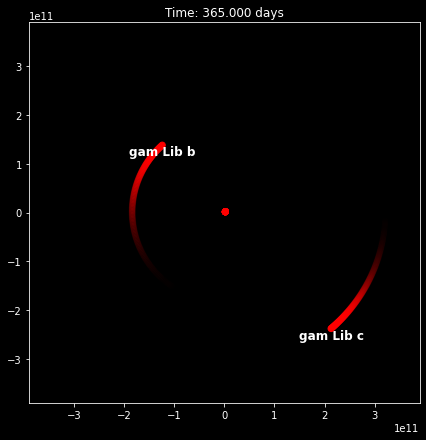

In [10]:
######################################################################################################
###                                                                                                ###
###                                      Adjustable Parameters                                     ###
###                                                                                                ###
######################################################################################################

fade_rate=0.96     ### Rate at which lines fade    
scale=1.2          ### Pad scaling on graph        

######################################################################################################

x_vals=[]    ### Holds temporary x-position data (in animation loop)
y_vals=[]    ### Holds temporary y-position data (in animation loop)
x_pos=[]     ### Holds x-position data for all planets
y_pos=[]     ### Holds y-position data for all planets
intensity=[] ### Holds intensity (opacity values) in animation loop

### Stores x- and y- data for each body in respective lists
for body in bodies_list:
    x_temp, y_temp = body.positions_history()
    x_pos.append(x_temp)
    y_pos.append(y_temp)
    
### Holds the total number of frames to generate
t_vals = [i for i in range(len(x_pos[0]))]

### Initializes figure
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax.axis([-max_dist*scale,max_dist*scale,-max_dist*scale,max_dist*scale])

### Determines color mapping used for animation
colors = [[1,0,0,0],[1,0,0,0.5],[1,0,0,1]]
cmap = LinearSegmentedColormap.from_list("", colors)

### Creates an initial scatter plot
scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)

### Prevents FuncAnimation from running t=0 twice
def init():
    pass

### Function with two return values
def get_new_vals(t):
    
    """
    Returns the positions of each exoplanet at a given instant
    
    Parameters
    t: time
    
    Returns
    x: x-positions of each exoplanet at time t
    y: y-positions of each exoplanet at time t
    """
    
    x = [x_pos[i][t] for i in range(len(bodies_list))]
    y = [y_pos[i][t] for i in range(len(bodies_list))]
    
    return list(x), list(y)

### Animation Loop
def update(t):
    
    ### Initializes global constants
    global x_vals, y_vals, intensity, text_flag, text_list, text
    
    ### Prints the frame the animation is generating
    if t%50==0 and t!=0:
        print('Frame:', t)
    
    ### Initializes text_flag and text_list
    ### NOTE: This is done to allow us to delete text from the last frame
    if t==0:
        text_flag=True
        text_list=[]
    
    ### Removes the text from last frame
    if text_flag:
        for label in text_list:
            label.remove()
        text_flag = False
    
    ### Get updated positions
    new_xvals, new_yvals = get_new_vals(t)
    x_vals.extend(new_xvals)
    y_vals.extend(new_yvals)
    
    ### Displays labels for each planet on the frame
    text_list = []
    for i in range(len(pl_names)):
        text_list.append(plt.text(new_xvals[i], new_yvals[i], pl_names[i], horizontalalignment='center', verticalalignment='top', fontweight='heavy', fontsize=12))
    
    ### Adjusts the positions of each dot
    scatter.set_offsets(np.c_[x_vals,y_vals])
    
    ### Adjusts the opacity of each dot
    intensity = np.concatenate((np.array(intensity)*fade_rate, np.ones(len(new_xvals))))
    scatter.set_array(intensity)
    
    ### Calculate frame time and assign to plot title
    time = t*dt
    ax.set_title('Time: %0.3f days' %(time/86400))

    ### Tells the loop to delete the labels from this loop on the next run
    text_flag = True
    
### Generates gif of orbital motions
print("Making animation...")
print("TOTAL FRAMES:", len(t_vals))
ani = matplotlib.animation.FuncAnimation(fig, update, init_func=init, frames=t_vals,interval=40)
ani.save(host_of_interest + '.gif')
plt.show()